In [1]:
import numpy as np
import pandas as pd


In [30]:
train = pd.read_csv('./train.csv',index_col = 'no',na_values="?")
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [3]:
test = pd.read_csv('./test_null.csv',index_col = 'no',na_values="?")
test.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29306,18,,245274,Some-college,10,Never-married,,Own-child,White,Male,0,0,16,United-States
1,29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
2,29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
3,29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


데이터 전처리 및 데이터 탐색

In [4]:
# income 존재
train.columns
# age : 나이
# workclass : 고용 형태
# fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
# education : 교육 수준
# education_num : 교육 수준 수치
# marital_status: 결혼 상태
# occupation : 업종
# relationship : 가족 관계
# race : 인종
# sex : 성별
# capital_gain : 양도 소득
# capital_loss : 양도 손실
# hours_per_week : 주당 근무 시간
# native_country : 국적
# income : 수익 (예측해야 하는 값)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
# income 없음
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [6]:
# 결측치 개수확인
print(train.isnull().sum())
# 'workclass' 1663 
# 'occupation'  1668
# 'native-country' 495

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
print('test')
print(test.isnull().sum())
# 'workclass' 1136 
# 'occupation'  1141
# 'native-country' 362

test
no                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


그럼 이 결측치들을 어떻게 처리를 해야할까
  > 일단 workclass는 하나가 엄청 많이 나와서 그걸로 다 채워주면 될듯
  > occupation 업종은 다양하게 분포가 되어있어서 인터넷/ <br> 기술통계확인은 언제하는거지 암튼 처리 해보면 나쁘진 않을듯
  > 국적..국적도 그닥 크게 필요할 것 같진 않은데

In [8]:
# workclass 확인
train[train['workclass'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,


In [9]:
# 보면 Private 사설이 가장 많음 그냥 여기로 결측치 1663개 넣어줌
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
                      1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [10]:
train['workclass'] = train['workclass'].fillna('Private')

In [11]:
# workclass 결측값 채워줌! 끝
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
test['workclass']= test['workclass'].fillna('Private')
test['workclass']

0                         
1                  Private
2                  Private
3         Self-emp-not-inc
4                  Private
               ...        
19532     Self-emp-not-inc
19533              Private
19534              Private
19535              Private
19536              Private
Name: workclass, Length: 19537, dtype: object

고럼 우리 occupation은 어떻게 채워주냐

In [13]:
train[train['occupation'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,


In [14]:
train['occupation'].value_counts()

# 기술 지원, 공예 수리, 기타 서비스, 판매, 중역, 
# 전문 교수, 핸들러 청소부, 기계 조작 감독, Adm-사무, 
# 농업-어업, 운송-이사, Priv-house- 봉사, 보호 봉사, 군대.

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
                      1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [15]:
# Prof-specialty  417
# Craft-repair  417
# Exec-managerial 417
# Adm-clerical  417

In [16]:
train['occupation'] = train['occupation'].fillna('Prof-specialty',limit=417)
train['occupation'] = train['occupation'].fillna('Craft-repair',limit=417)
train['occupation'] = train['occupation'].fillna('Exec-managerial',limit=417)
train['occupation'] = train['occupation'].fillna('Adm-clerical',limit=417)

In [17]:
train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
                      1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [18]:
test['occupation'] = test['occupation'].fillna('Prof-specialty',limit=417)
test['occupation'] = test['occupation'].fillna('Craft-repair',limit=417)
test['occupation'] = test['occupation'].fillna('Exec-managerial',limit=417)
test['occupation'] = test['occupation'].fillna('Adm-clerical',limit=417)

In [19]:
train['native-country'] = train['native-country'].fillna('United-States')

In [20]:
train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
                                 495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru                             25
 

In [21]:
test['native-country'] = test['native-country'].fillna('United-States')


In [22]:
test.isnull().sum()

no                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [23]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


레이블 인코딩 해보기

In [25]:
from sklearn.preprocessing import LabelEncoder
temp =train.columns[train.dtypes=='object']

le = LabelEncoder()
for i in temp:
    le.fit(train[i])
    train[i] =le.transform(train[i])

In [26]:
train.corr()['income'].abs().sort_values(ascending=False)

income            1.000000
education-num     0.331798
relationship      0.257709
age               0.238460
hours-per-week    0.231045
capital-gain      0.221387
sex               0.215613
marital-status    0.198866
capital-loss      0.135645
education         0.081312
occupation        0.078490
race              0.075287
workclass         0.047796
native-country    0.017058
fnlwgt            0.002994
Name: income, dtype: float64

In [27]:
import matplotlib.pyplot as plt  # 그래프 시각화
import seaborn as sns

<Axes: >

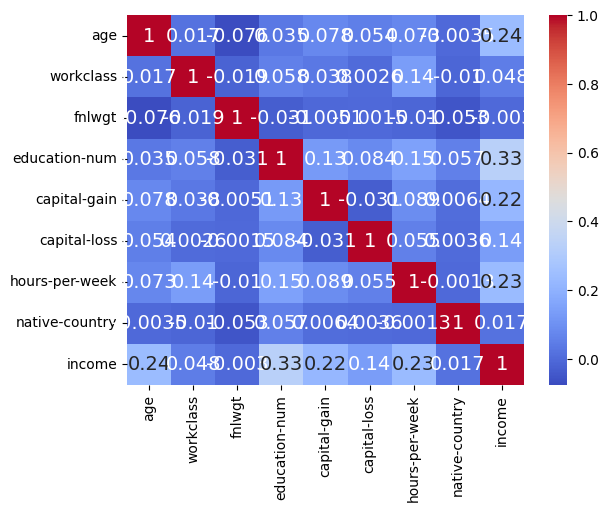

In [28]:
heatmap_data = train[['age','workclass','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','native-country','income']]
sns.heatmap(heatmap_data.corr(), annot = True , cmap = 'coolwarm',linecolor="white" , annot_kws = {"size" : 14} )

In [29]:
X_train = train.loc[ : , 'no':'hours-per-week' ]
y_train = train.loc[ : , 'income':]

X_test = test


KeyError: 'no'

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = train ,x = 'workclass', hue = 'income')
plt.show()

# 자영업자들이 1인사람이 되게 많네

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = train ,x = 'workclass', hue = 'income')
plt.show()